In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dir_path = '/Users/kessapassa/OneDrive - 神奈川工科大学/Laboratory/修論/files/'
dir_path += '染谷/old2/'
file_name = '3分前_201808080204_2020-02-02_16-39-36'
path = dir_path + file_name + '.txt'

In [3]:
# A1:筋電位(emg), A2:心電図(ecg), A3:皮膚電気活動(eda), A4:脳波(eeg)
columns = ["nSeq", "I1", "I2", "O1", "O2", "A1", "A2", "A3", "A4", "A5", "A6"]
sampling_rate = 1000

df = None
reader = pd.read_csv(path, sep='\t', header=None, names=columns, index_col=False, chunksize=600*sampling_rate)
for r in reader:
    if df is None:
        #  頭から3行目は要らない
        df = r.drop([i for i in range(3)])
    else:
        df = df.append(r, ignore_index=True)
        
df = df.reset_index(drop=True)

print(df.shape)
print('{}分{:.2f}秒'.format(df.shape[0]//sampling_rate//60, df.shape[0]/sampling_rate%60))
df.head()

(324900, 11)
5分24.90秒


/Users/kessapassa/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,nSeq,I1,I2,O1,O2,A1,A2,A3,A4,A5,A6
0,0,0.0,0.0,0.0,0.0,505.0,495.0,2.0,500.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,507.0,495.0,0.0,499.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,508.0,495.0,0.0,514.0,0.0,0.0
3,3,0.0,0.0,0.0,0.0,509.0,495.0,0.0,478.0,0.0,0.0
4,4,0.0,0.0,0.0,0.0,509.0,495.0,0.0,465.0,0.0,0.0


In [4]:
target='A4'
start_minite = 4.5
end_minite = 5.5

start_time = int(sampling_rate * 60 * start_minite)
end_time = int(sampling_rate * 60 * end_minite)
df_target = df[target][start_time:end_time]
# df_target = df[target]

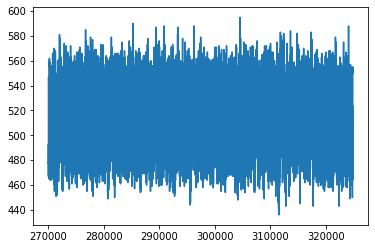

In [5]:
plt.plot(df_target)

In [6]:
from biosppy import storage
from biosppy.signals import eeg

df_target = pd.DataFrame(df_target)
out =  eeg.eeg(df_target.values, sampling_rate=sampling_rate, show=False)

/Users/kessapassa/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


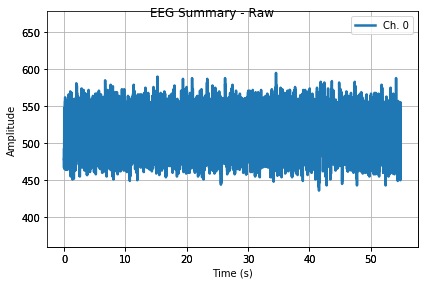

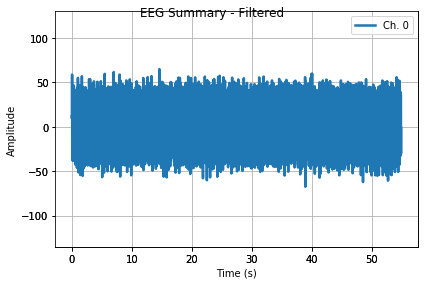

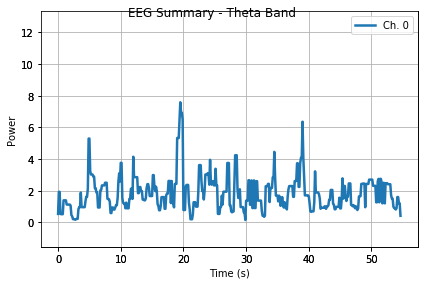

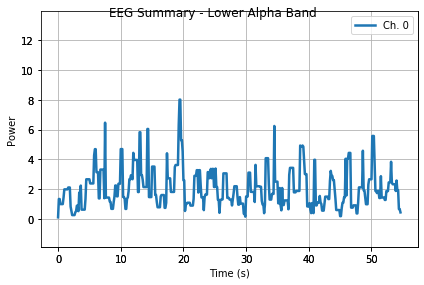

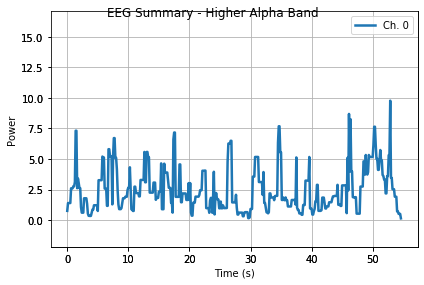

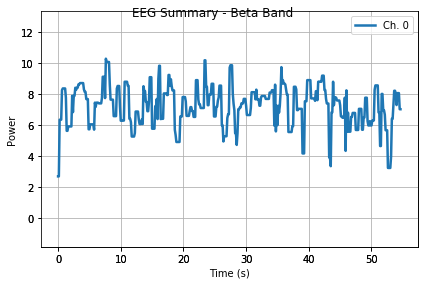

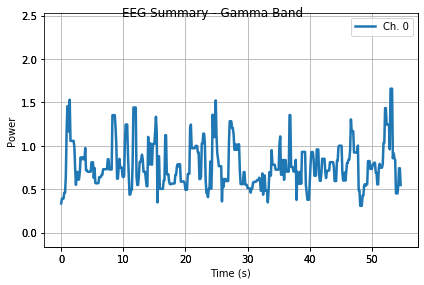

In [7]:
# plfをplotするときにエラーが出るのでshowはFalse
try:
    eeg.eeg(df_target.values, sampling_rate=sampling_rate, show=True)
except:
    pass

In [8]:
out.keys()

['ts',
 'filtered',
 'features_ts',
 'theta',
 'alpha_low',
 'alpha_high',
 'beta',
 'gamma',
 'plf_pairs',
 'plf']

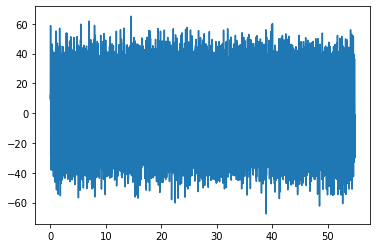

In [9]:
plt.plot(out['ts'], out['filtered'])

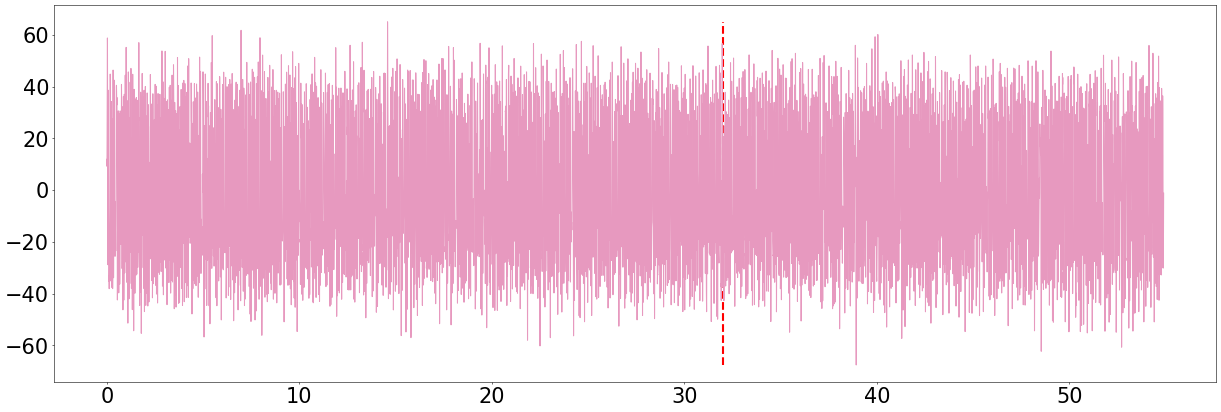

In [48]:
component = 'filtered'
plt.figure(figsize=(30, 10), dpi=50)
plt.rcParams["font.size"] = 30
plt.plot(out['ts'], out[component], '#e799bf')
plt.vlines(32, out[component].min(), out[component].max(), 'red', linestyles='dashed', lw=3)
# plt.xlim([-1,60])
plt.savefig('eeg_'+component+'.png')

In [16]:
ef

NameError: name 'ef' is not defined

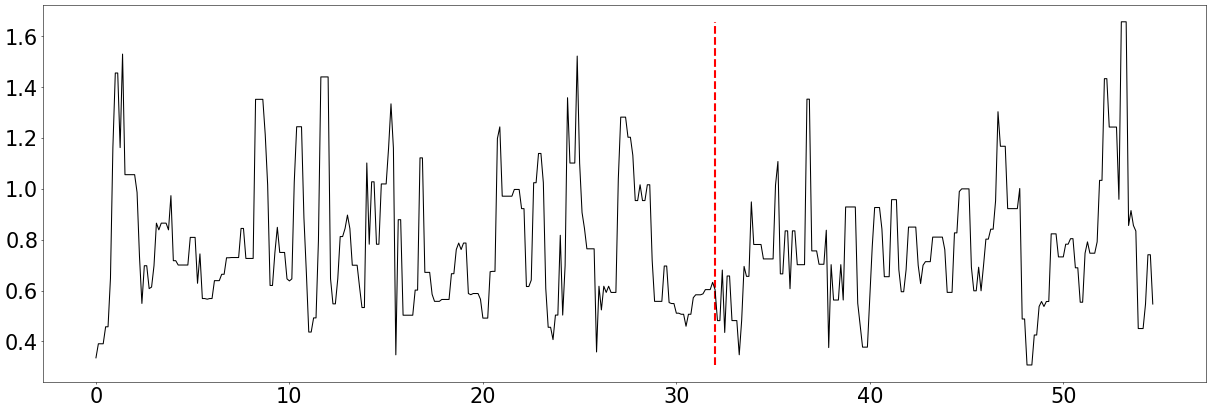

In [11]:
component = 'gamma'
plt.figure(figsize=(30, 10), dpi=50)
plt.rcParams["font.size"] = 30
plt.plot(out['features_ts'], out[component], 'k')
plt.vlines(32, out[component].min(), out[component].max(), 'red', linestyles='dashed', lw=3)
# plt.savefig('eeg_'+component+'.png')

In [12]:
import sys
sys.path.append('./')
from common import Common

In [13]:
train_data =df[target][10000:12000].values
test_data = df_target.values
c = Common(train_data, test_data)

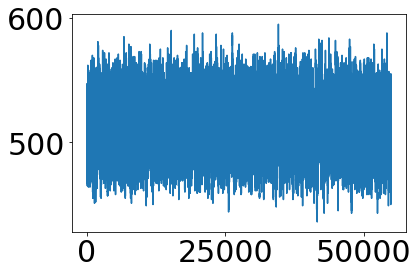

In [14]:
plt.plot(test_data)

In [15]:
c.k_neighborhood(width=100, nk=1)

KeyboardInterrupt: 

In [ ]:
c.ssa(width=100)